# Soal 2 - EDA (Exploratory Data Analysis) Real Estate (40 poin)
-Anda adalah seorang Data Scientist di sebuah perusahaan real estate di Melbourne. Anda diberikan dataset tentang harga rumah berbagai tipe di Melbourne beserta variabel-variabel terkait rumah seperti jumlah kamar, luas tanah, metode penjualan, dan lainnya.

Data ini adalah cuplikan data yang dibuat oleh Tony Pino. Data harga rumah ini merupakan hasil web scrapping dari data yang terpublikasikan untuk publik melalui Domain.com.au.

Informasi mengenai keterangan variabel (features) dan apabila Anda kesulitan download dataset pada repo ini, Anda bisa akses Kaggle

### Soal: Buatlah sebuah file notebook (EDA_HouseMarket.ipynb) dan ikuti panduan Exploratory Data Analysis berikut:

In [2]:
# Import Package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
## Read csv
df = pd.read_csv('melb_data.csv')
df.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [7]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [9]:
df.shape

(13580, 21)

In [10]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [11]:
df.describe(include = np.object)

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,13580,13580,13580,13580,13580,13580,12211,13580
unique,314,13378,3,5,268,58,33,8
top,Reservoir,28 Blair St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,359,3,9449,9022,1565,473,1163,4695


In [12]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


## 1. Untuk feature/column Landsize & Price, hitung dan beri penjelasan (insight) terkait:

- Titik Pusat Data (Central Tendency)
- Persebaran Data (Dispersion)
- Distribusi Data (Distribution)

In [15]:
df_1 = df[['Price', 'Landsize']]
df_1

,Price,Landsize
0,1480000.0,202.0
1,1035000.0,156.0
2,1465000.0,134.0
3,850000.0,94.0
4,1600000.0,120.0
...,...,...
13575,1245000.0,652.0
13576,1031000.0,333.0
13577,1170000.0,436.0
13578,2500000.0,866.0


In [26]:
#Fast EDA
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,13580.0,1.075684e+06,639310.724296,85000.0,650000.0,903000.0,1330000.0,9000000.0
Landsize,13580.0,5.584161e+02,3990.669241,0.0,177.0,440.0,651.0,433014.0


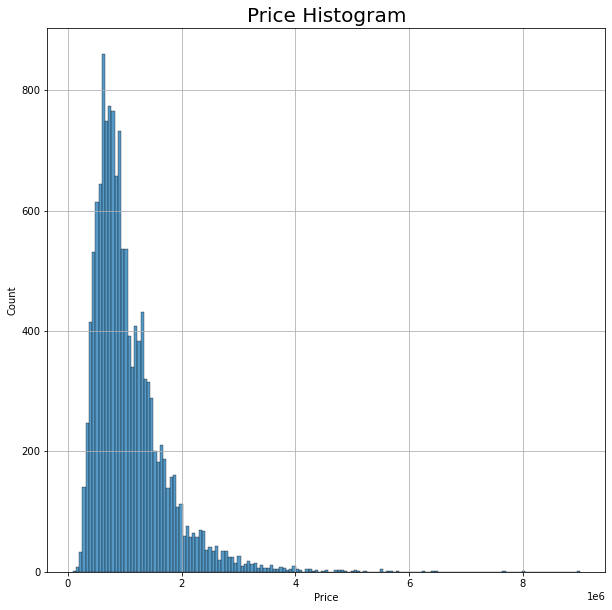

In [20]:
## Plot Histogram Price
plt.figure(figsize=(10,10))
sns.histplot(df_1['Price'])
plt.title('Price Histogram', size=20)
plt.grid()
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


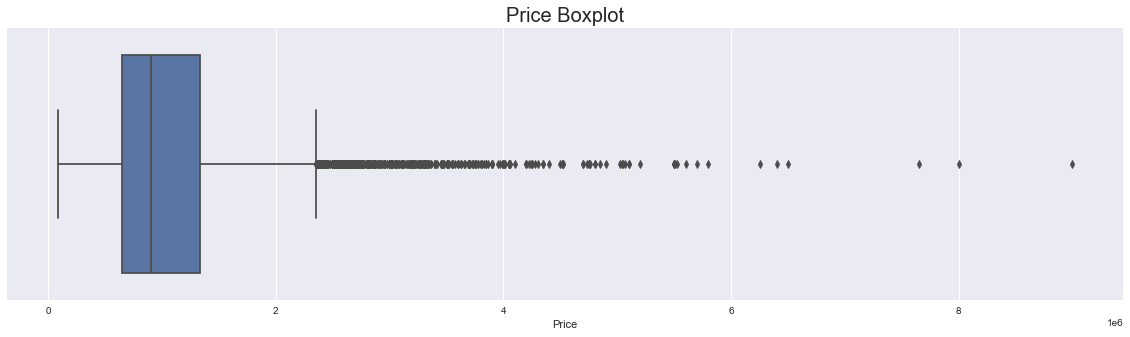

In [152]:
plt.figure (figsize=(20,5))
sns.boxplot(df_1['Price'])
plt.title('Price Boxplot', size=20)
plt.show()

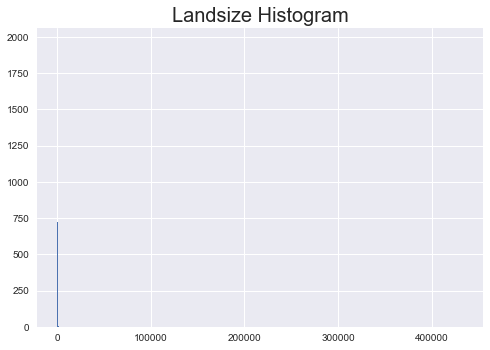

In [157]:
plt.hist(df_1['Landsize'], bins=10000)
plt.title('Landsize Histogram', size=20)
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


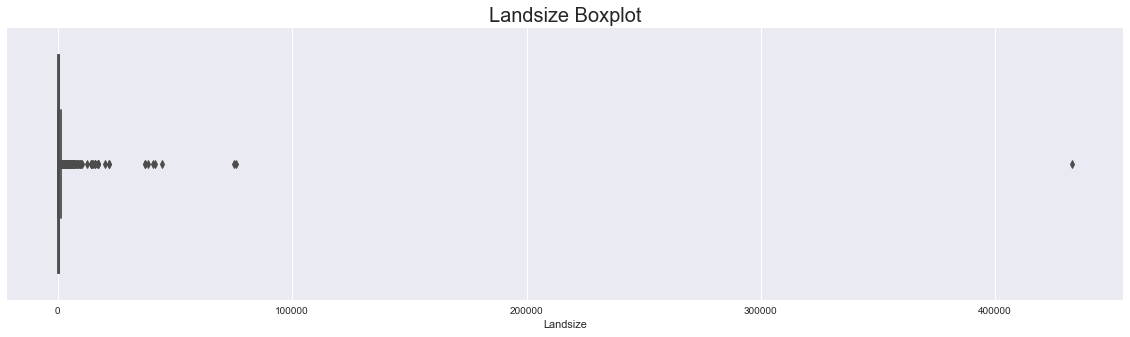

In [153]:
plt.figure (figsize=(20,5))
sns.boxplot(df_1['Landsize'])
plt.title('Landsize Boxplot', size=20)
plt.show()

### ANSWER
Berdasarkan fungsi describe dan histogram plot- boxplot didapatkan
- Price = Memiliki nilai tengah/pusat data (Q2) di 903.000. Memiliki persebaran/skewness data yang positif sehingga value Price relatif cenderunng lebih banyak yang murah dibandingkan yang mahal. Secara distribusinya memiliki kurtosis leptokurtik atau Beta 2 > 3
- Landsize = landsize secara grafik tidak memiliki persebaran atau hanya terkonsentrasi disatu persebaran. Secara boxplot landsize sangat memiliki outliers yang jauh sekali dari nilai tengah atau mainbox dari box plot tersebut. Sehingga secara persebaran sangat tidak normal

### 2. Carilah data outlier dan beri penjelasan (insight) pada feature/column Distance ! Tambahkan plot untuk menampilkan adanya data outlier!

In [47]:
df.sample(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
8416,Sunshine,69 Duke St,3,h,710000.0,S,Village,29/04/2017,12.6,3020.0,...,1.0,0.0,483.0,93.84,1950.0,Brimbank,-37.78750,144.84560,Western Metropolitan,3755.0
8912,Ormond,6/32 Walsh St,2,u,562000.0,S,Gary,1/07/2017,11.4,3204.0,...,1.0,1.0,0.0,88.00,1970.0,Glen Eira,-37.90286,145.04772,Southern Metropolitan,3578.0


In [72]:
df.describe()['Distance']

count    13580.000000
mean        10.137776
std          5.868725
min          0.000000
25%          6.100000
50%          9.200000
75%         13.000000
max         48.100000
Name: Distance, dtype: float64

In [66]:
### Create each parameter
Q1 = df.describe()['Distance']['25%']
Q3 = df.describe()['Distance']['75%']
IQR = Q3 - Q1
upperFence =  Q3 + (1.5 * IQR)
lowerFence = Q1 - (1.5 * IQR)

In [71]:
## Data Outliers in Distance
df[(df['Distance']<lowerFence) | (df['Distance']>upperFence)].sort_values(by='Distance', ascending=False).tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
8937,Rowville,11 Jindalee Cl,5,h,870000.0,S,Harcourts,1/07/2017,23.5,3178.0,...,2.0,2.0,733.0,217.0,1986.0,Knox,-37.91894,145.24305,South-Eastern Metropolitan,11667.0
10038,Rowville,71 Kellbourne Dr,4,h,860000.0,S,Fletchers,24/06/2017,23.5,3178.0,...,2.0,0.0,725.0,196.0,1985.0,Knox,-37.90880,145.26319,South-Eastern Metropolitan,11667.0
11496,Rowville,3 Barwon Ct,3,h,735000.0,S,Barry,15/07/2017,23.5,3178.0,...,2.0,1.0,721.0,143.0,1984.0,Knox,-37.91713,145.24706,South-Eastern Metropolitan,11667.0
11187,Rowville,38 Armstrong Dr,5,h,970000.0,S,Harcourts,12/08/2017,23.5,3178.0,...,3.0,2.0,725.0,NaN,NaN,Knox,-37.92739,145.25705,South-Eastern Metropolitan,11667.0
11497,Rowville,2 Wallingford Pl,3,h,755000.0,S,Harcourts,15/07/2017,23.5,3178.0,...,2.0,2.0,551.0,178.0,2003.0,Knox,-37.94266,145.24662,South-Eastern Metropolitan,11667.0


In [68]:
## Count outliers for distance
df['Distance'][(df['Distance']<lowerFence) | (df['Distance']>upperFence)].count()

411

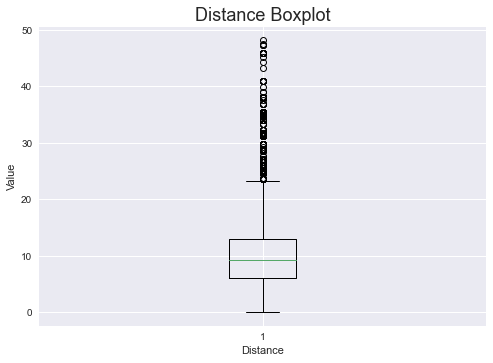

In [183]:
### Boxplot for Distance
## Create BoxPlot
plt.boxplot(df['Distance'])                    # Call boxplot
plt.title('Distance Boxplot', size = 18)       # Title
plt.xlabel('Distance')                           # X label
plt.ylabel('Value')                                # Y label
plt.grid(True)
plt.show()

### ANSWER
Berdasarkan fungsi penentuan outliers berdasarkan IQR dan Boxplot
- Terdapat 411 jumlah nilai data ouliers pada Distance
- Nilai data outliers ini dimulai dari nilai >= 23.5
- Distance memiliki mean 10.13
- Q1 = 6.1
- Q2 = 9.2
- Q3 = 13.0
- Fungsi pencarian outliers sesuai dengan apa yang di plot dengan boxplot

### 3. Tampilkan distribusi (sebaran data) dalam bentuk plot yang tepat, untuk feature/column YearBuilt. Jelaskan insight apa yang Anda dapatkan di setiap plot tersebut!



In [79]:
df_yearbuilt = df['YearBuilt']

0           NaN
1        1900.0
2        1900.0
3           NaN
4        2014.0
          ...  
13575    1981.0
13576    1995.0
13577    1997.0
13578    1920.0
13579    1920.0
Name: YearBuilt, Length: 13580, dtype: float64

In [99]:
## Aggregation Func
df_year = pd.DataFrame(df['YearBuilt'].value_counts().reset_index().rename(columns={"index":"YearBuilt", "YearBuilt":"counts"}))
df_year = df_year.sort_values(by='YearBuilt')
df_year



,YearBuilt,counts
123,1196.0,1
131,1830.0,1
92,1850.0,4
122,1854.0,1
129,1856.0,1
...,...,...
24,2014.0,100
33,2015.0,65
36,2016.0,58
49,2017.0,18


In [165]:
df_year1800 = df_year[(df_year.YearBuilt>1800)]
df_year1800

,YearBuilt,counts
131,1830.0,1
92,1850.0,4
122,1854.0,1
129,1856.0,1
126,1857.0,1
...,...,...
24,2014.0,100
33,2015.0,65
36,2016.0,58
49,2017.0,18


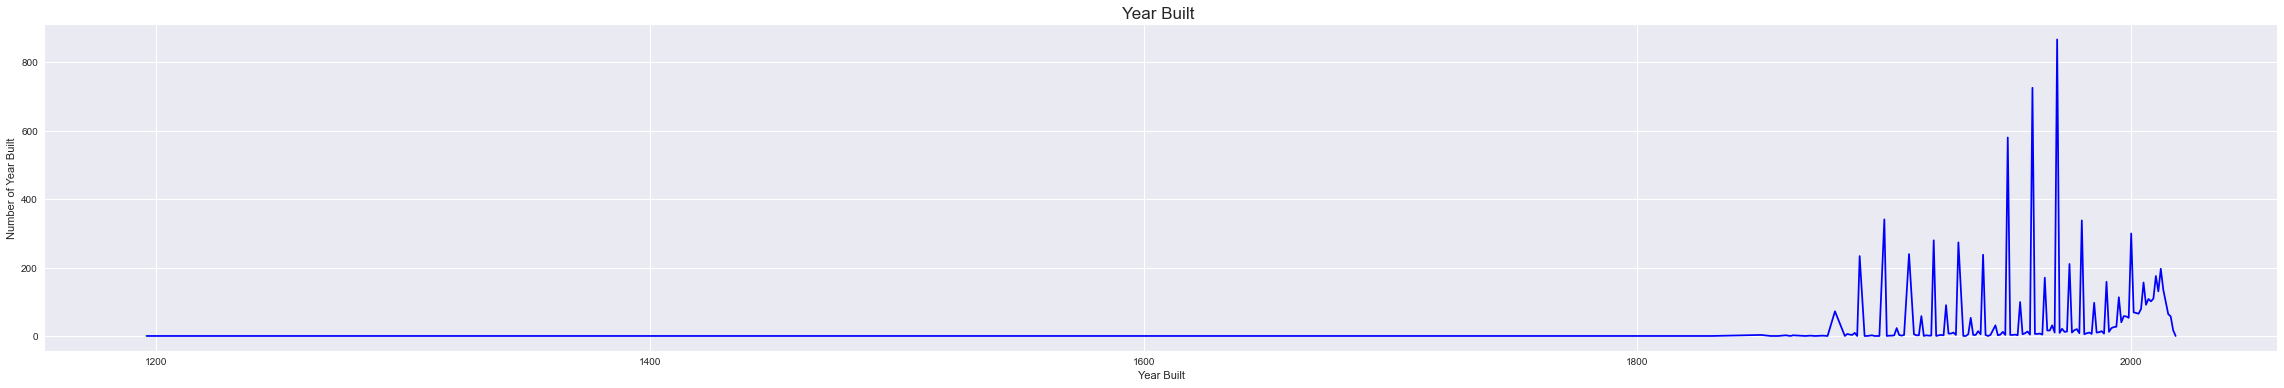

In [96]:
## Create a Time graphic                                    
plt.figure(figsize=(40,6))# Figure Size
plt.plot(df_year['YearBuilt'],
         df_year['counts'],      
        'blue')                                               
plt.title('Year Built ', size=17)  
plt.xlabel('Year Built')                                         
plt.ylabel('Number of Year Built')                            
plt.show()

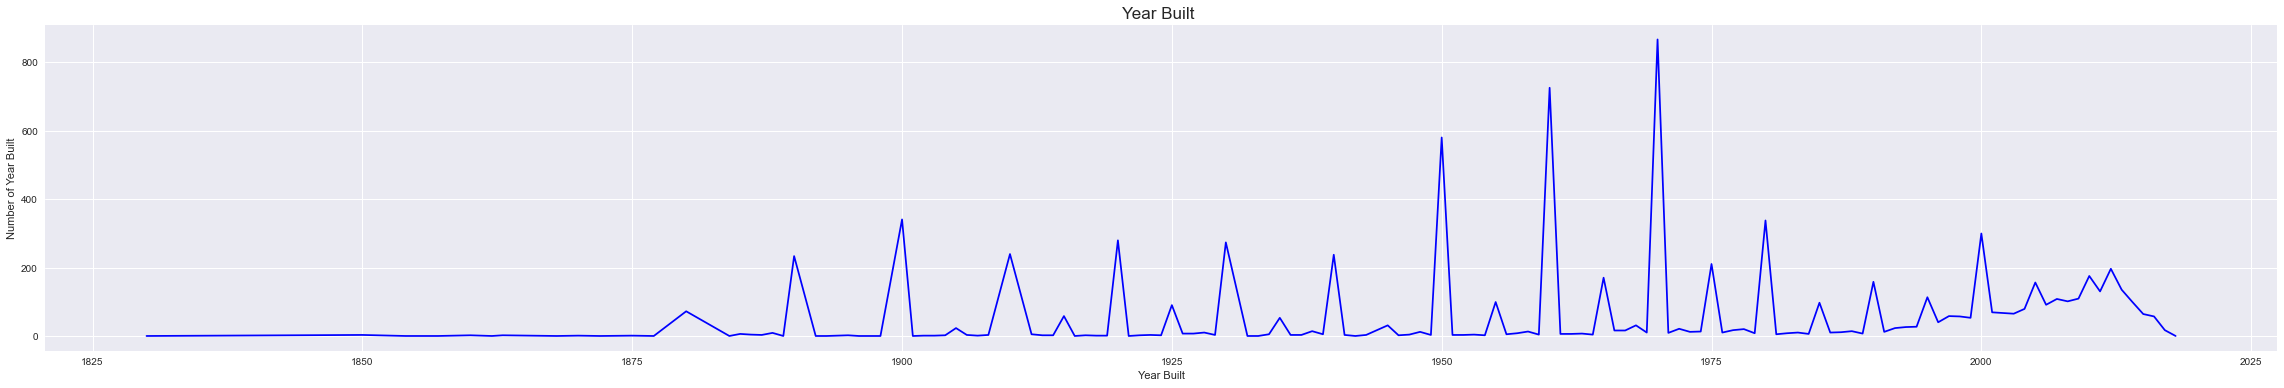

In [166]:
## Create a Time graphic                                    
plt.figure(figsize=(40,6))# Figure Size
plt.plot(df_year1800['YearBuilt'],
         df_year1800['counts'],      
        'blue')                                               
plt.title('Year Built ', size=17)  
plt.xlabel('Year Built')                                         
plt.ylabel('Number of Year Built')                            
plt.show()

### ANSWER
Berdasarkan hasil plot grafik Year Built
- Pada tahun 1196 - 1876 pembangunan rumah di melbourne cukup Flat hanya 1 rumah per tahun
- Pembangunan mengalami grafik kenaikan yang sangat pesat pada awal 1876an hingga tahun 1973an.
- Pembangunan pada tahun 1973an hingga 2000 secara global cebderung menurun. Namun secara lokal cebderung naik.
- Pembangunan pada tahun 2000 - 2018 cenderung turun
- Rumah di Melbourne seecara umum merupakan rumah yangg dibangun di rentang tahun 1900-1990an
- Rumah di melbourne sepetinya sudah mengalami kepadatan sehingga grafik yang terjadi pada 5 tahun terakhir cenderung menurun. Hal ini dapat memicu nainya harga rumah karena tidak adanya supply baru

### 4. Tampilkan perkembangan rata-rata harga (price) rumah berdasarkan tahun pembangunan rumah (Year) menggunakan plot yang tepat! Jelaskan (insight) perkembangan rata-rata harga rumah dari plot yang Anda buat!

In [100]:
df.sample(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13460,Keilor East,17 Diorite Ct,1,h,860000.0,SP,Ace,26/08/2017,11.7,3033.0,...,1.0,NaN,472.0,NaN,NaN,NaN,-37.74061,144.87462,Western Metropolitan,5629.0
8173,Northcote,133 Beavers Rd,2,h,1050000.0,S,Jellis,29/04/2017,5.5,3070.0,...,1.0,1.0,181.0,85.0,1925.0,Darebin,-37.76590,144.99030,Northern Metropolitan,11364.0
10004,Parkdale,22 Keith St,4,h,1300000.0,SP,Buxton,24/06/2017,21.5,3195.0,...,2.0,2.0,597.0,150.0,1970.0,Kingston,-37.99232,145.08469,South-Eastern Metropolitan,5087.0


In [191]:
df['year'] = pd.to_datetime(df['Date'])

In [193]:
df['year'] = df['year'].year()

AttributeError: 'Series' object has no attribute 'year'

In [162]:
df_rataYear = df[['YearBuilt','Price']].groupby(by=['YearBuilt'], as_index=False).mean().sort_values(by=['YearBuilt'], ascending=False)


df_rata1800 = df_rataYear[(df_rataYear.YearBuilt>1800)]
df_rataYear

,YearBuilt,Price
143,2018.0,1.310000e+06
142,2017.0,1.037972e+06
141,2016.0,1.523655e+06
140,2015.0,1.231485e+06
139,2014.0,9.219150e+05
...,...,...
4,1856.0,2.260000e+06
3,1854.0,3.310000e+06
2,1850.0,1.179500e+06
1,1830.0,8.550000e+05


In [163]:
df_rata1800

,YearBuilt,Price
143,2018.0,1.310000e+06
142,2017.0,1.037972e+06
141,2016.0,1.523655e+06
140,2015.0,1.231485e+06
139,2014.0,9.219150e+05
...,...,...
5,1857.0,2.200000e+06
4,1856.0,2.260000e+06
3,1854.0,3.310000e+06
2,1850.0,1.179500e+06


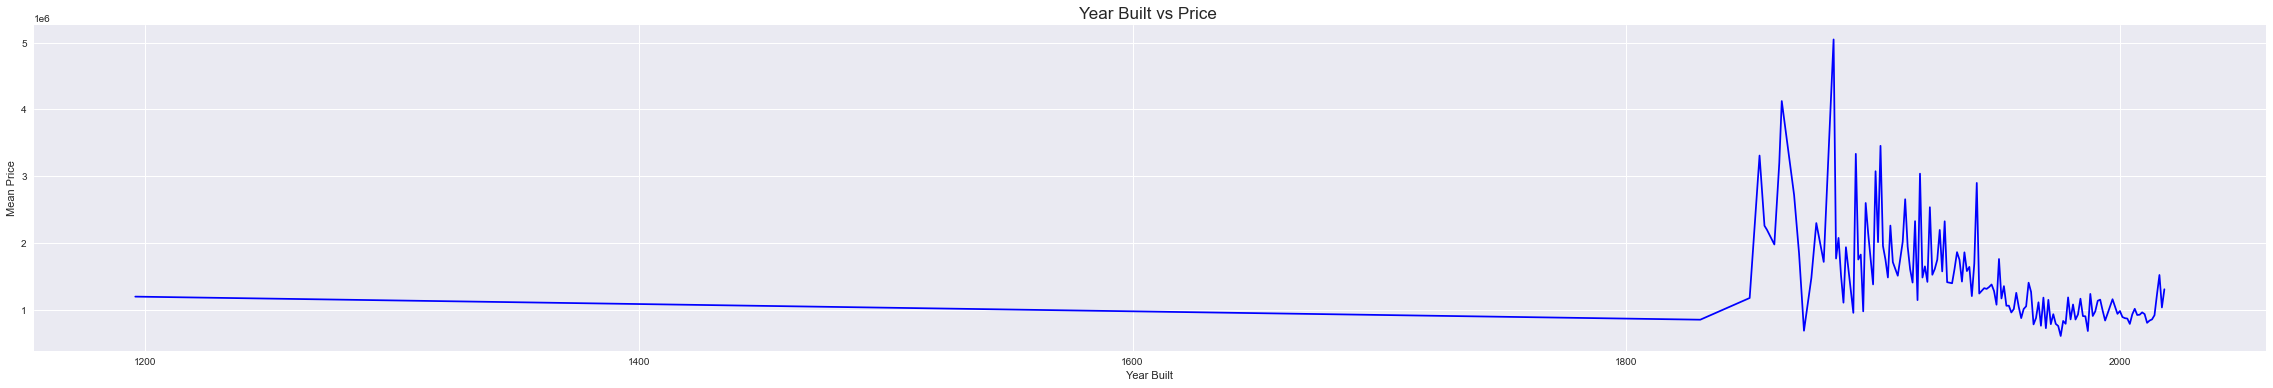

In [160]:
## Create a Time graphic                                    
plt.figure(figsize=(40,6))# Figure Size
plt.plot(df_rataYear['YearBuilt'],
         df_rataYear['Price'],      
        'blue')                                               
plt.title('Year Built vs Price ', size=17)  
plt.xlabel('Year Built')                                         
plt.ylabel('Mean Price')                            
plt.show()

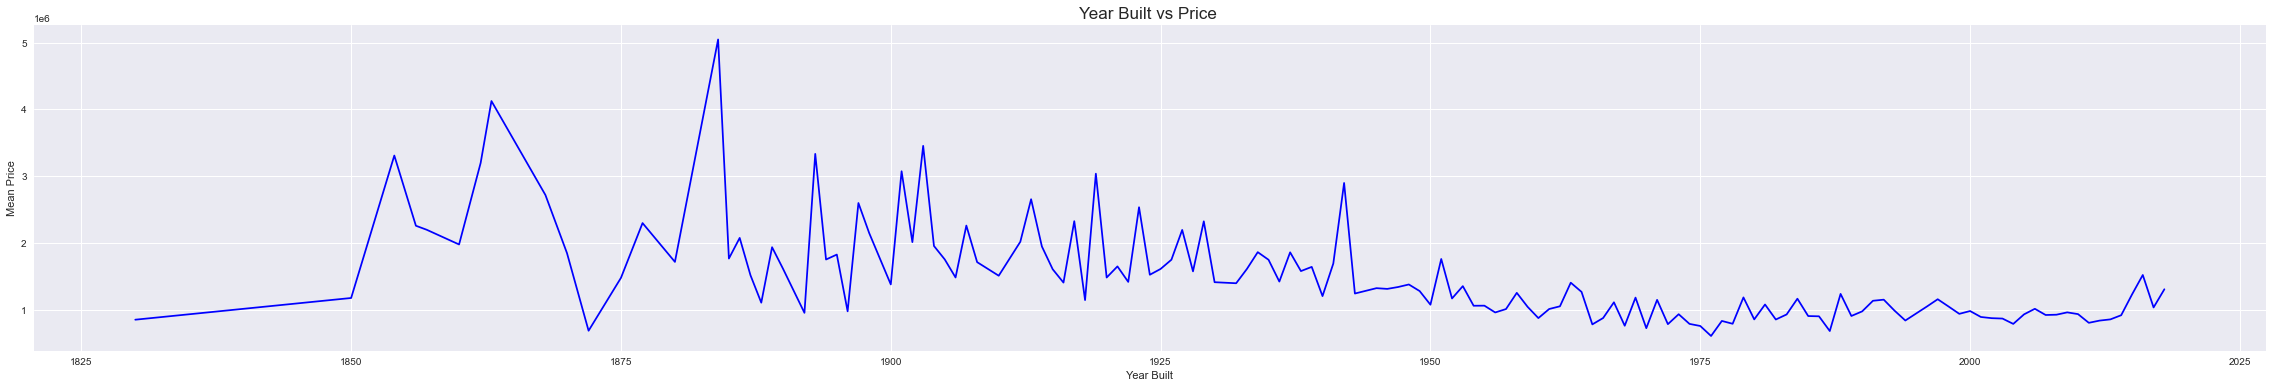

In [164]:
## Create a Time graphic                                    
plt.figure(figsize=(40,6))# Figure Size
plt.plot(df_rata1800['YearBuilt'],
         df_rata1800['Price'],      
        'blue')                                               
plt.title('Year Built vs Price ', size=17)  
plt.xlabel('Year Built')                                         
plt.ylabel('Mean Price')                            
plt.show()

### ANSWER
Berdasarkan hasil plot grafik Year Built dan rata-rata Price
- Pada tahun 1826 - 18an rata-rata harga rumah di Melbourne yaitu turun yang pada awalnya 1.3 juta menjadi 900 jtan
- Pada tahun 1826an terjadi kenaikan harga secara umum hingga pada tahun 1879n 
- Pada tahun 1880an hingga tahun 2018 secara umum harga turun walaupun terdapat beberapa fluktuasi yang sifatnya lokal
- rumah di melbourne memiliki nilai rata-rata harga paling mahal yaitu mencapai 5,1 juta di tahun 1870an
- Perusahaan dan konsumen memiliki supply/demand yang baik sehingga harga dapat cenderung flat dari tahun 1950 hingga 2018

### 5. Di antara Landsize, Distance, & Rooms, manakah feature/column yang memiliki nilai korelasi tertinggi pada feature/column Price? Jelaskan metode korelasi apa yang Anda gunakan, serta apa insight untuk perusahaan setelah mengetahui nilai korelasi tersebut?

In [113]:
df_5 = df[['Landsize', 'Price', 'Rooms']]
df_5.head()

,Landsize,Price,Rooms
0,202.0,1480000.0,2
1,156.0,1035000.0,2
2,134.0,1465000.0,3
3,94.0,850000.0,3
4,120.0,1600000.0,4


In [115]:
df_5.cov()

,Landsize,Price,Rooms
Landsize,1.592544e+07,9.569192e+07,97.939125
Price,9.569192e+07,4.087182e+11,303453.062516
Rooms,9.793913e+01,3.034531e+05,0.913454


In [118]:
df_5.corr(method='pearson')

,Landsize,Price,Rooms
Landsize,1.000000,0.037507,0.025678
Price,0.037507,1.000000,0.496634
Rooms,0.025678,0.496634,1.000000


In [119]:
df_5.corr(method='spearman')

,Landsize,Price,Rooms
Landsize,1.000000,0.327200,0.485742
Price,0.327200,1.000000,0.539886
Rooms,0.485742,0.539886,1.000000


In [120]:
df_5.corr(method='kendall')

,Landsize,Price,Rooms
Landsize,1.000000,0.229082,0.393809
Price,0.229082,1.000000,0.428875
Rooms,0.393809,0.428875,1.000000


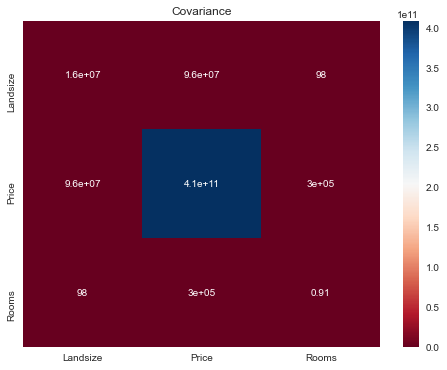

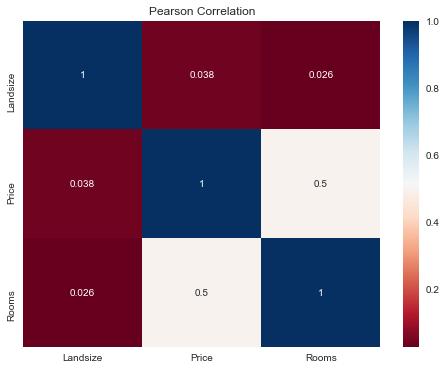

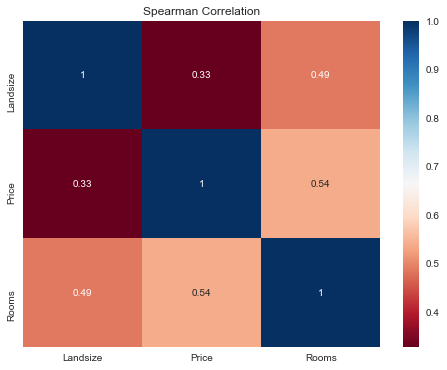

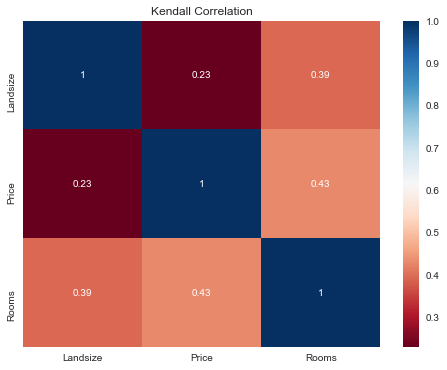

In [117]:
plt.figure(figsize = (8,6))       
sns.heatmap(df_5.cov()             
            , annot = True        
            , cmap = 'RdBu')
plt.title('Covariance')
plt.show()

plt.figure(figsize = (8,6))       
sns.heatmap(df_5.corr(method='pearson')             
            , annot = True        
            , cmap = 'RdBu')
plt.title('Pearson Correlation')
plt.show()

plt.figure(figsize = (8,6))       
sns.heatmap(df_5.corr(method='spearman')             
            , annot = True        
            , cmap = 'RdBu')
plt.title('Spearman Correlation')
plt.show()

plt.figure(figsize = (8,6))       
sns.heatmap(df_5.corr(method='kendall')             
            , annot = True        
            , cmap = 'RdBu')
plt.title('Kendall Correlation')
plt.show()

### ANSWER
Berdasarkan hasil perhitungan ke-4 metode korelasi dan plot grafik
- Korelasi metode covariance dan pearson tidak dapat digunakan untuk menunjukkan korelasi antar kolom pada kasus ini karena menghasilkan nilai yang bias

Dari metode korelasi spearman, dan kendall 
- Di urutan pertama yaitu ada Rooms dengan price
- Landsize dan rooms memiliki nilai korelasi yang paling rendah
- Ketiga metode menunjukan bahwa Landsize dengan Price memiliki nilai korelasi yang paling rendah

Insight
- Data yang memiliki keterkaitan satu sama lain yang tinggi yaitu data rooms dengan price. Sehingga semakin banyak room maka akan semakin mahal harganya

### 6. Temukan RegionName yang rata-rata harga (Price) propertinya paling tinggi, serta tampilkan RegionName dan rata-rata harga rumah dalam bentuk Barplot! Lalu, di region yang memiliki rata-rata harga properti tertinggi, carilah:

- Lima CouncilArea yang memiliki rata-rata harga rumah tertinggi!
- Tipe properti (Type) yang memiliki rata-rata harga rumah tertinggi!
- Metode penjualan properti (Method) yang paling sering dilakukan!

In [122]:
df.sample(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
6958,Hawthorn East,748 Burwood Rd,5,h,1700000.0,S,Marshall,6/08/2016,7.5,3123.0,...,3.0,2.0,431.0,203.0,1920.0,Boroondara,-37.8250,145.0536,Southern Metropolitan,6482.0
8698,Windsor,14/27 Lewisham Rd,2,u,585000.0,S,hockingstuart,8/04/2017,5.1,3181.0,...,1.0,1.0,0.0,79.0,1965.0,Stonnington,-37.8559,144.9990,Southern Metropolitan,4380.0


In [125]:
df_6region = df[['Regionname','Price']].groupby(by=['Regionname'], as_index=False).mean().sort_values(by=['Price'], ascending=False)
df_6region

,Regionname,Price
5,Southern Metropolitan,1.372963e+06
0,Eastern Metropolitan,1.104080e+06
4,South-Eastern Metropolitan,9.229438e+05
2,Northern Metropolitan,8.981711e+05
6,Western Metropolitan,8.664205e+05
1,Eastern Victoria,6.999808e+05
3,Northern Victoria,5.948293e+05
7,Western Victoria,3.975234e+05


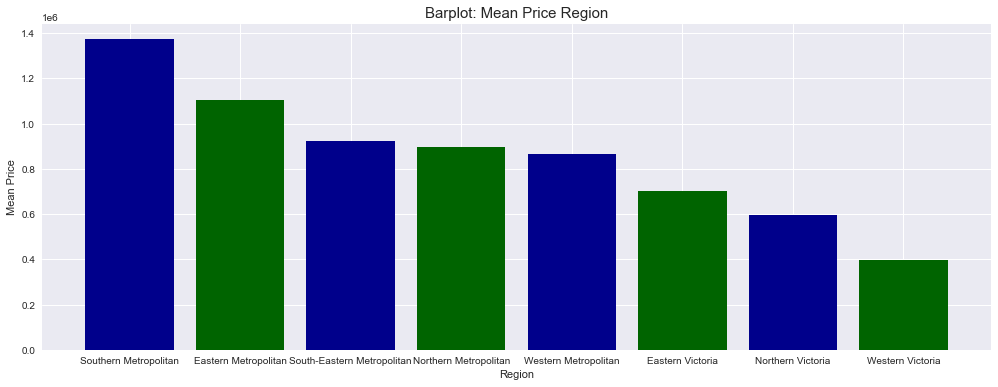

In [127]:
x = df_6region['Regionname'].unique().tolist()    #Fungsi unique pandas
y = df_6region['Price']

plt.figure(figsize=(17,6))
plt.bar(x, y, color=['darkblue','darkgreen'])
plt.title('Barplot: Mean Price Region', size=15)
plt.xlabel('Region')
plt.ylabel('Mean Price')
plt.show()

In [ ]:
## Region yang memiliki rata-rata Price tertinggi = Southern Metropolitan

In [131]:
df_SM = df[(df.Regionname=='Southern Metropolitan')]
df_6council = df_SM[['CouncilArea', 'Price']].groupby(by=['CouncilArea'], as_index=False).mean().sort_values(by=['Price'], ascending=False)
df_6council

,CouncilArea,Price
0,Bayside,1.652168e+06
1,Boroondara,1.646740e+06
8,Unavailable,1.325000e+06
9,Whitehorse,1.297237e+06
7,Stonnington,1.293382e+06
6,Port Phillip,1.144346e+06
5,Monash,1.091499e+06
2,Glen Eira,1.069279e+06
3,Kingston,9.909647e+05
4,Melbourne,9.209085e+05


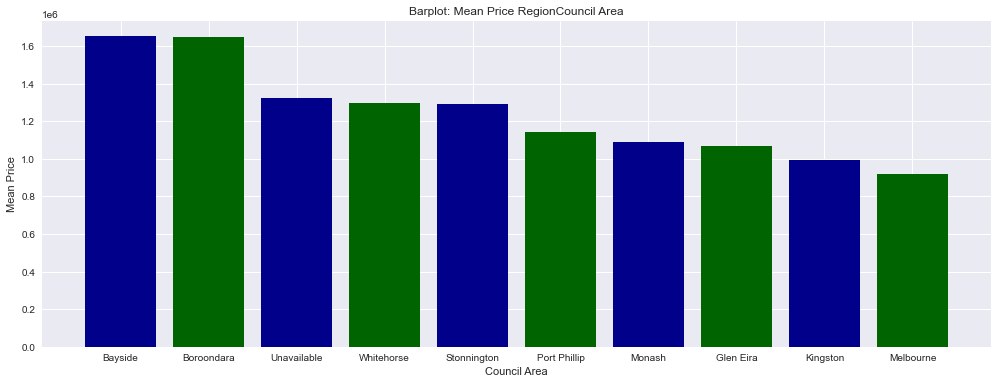

In [178]:
x = df_6council['CouncilArea'].unique().tolist()    #Fungsi unique pandas
y = df_6council['Price']

plt.figure(figsize=(17,6))
plt.bar(x, y, color=['darkblue','darkgreen'])
plt.title('Barplot: Mean Price RegionCouncil Area')
plt.xlabel('Council Area')
plt.ylabel('Mean Price')
plt.show()

In [173]:
df_6type = df_SM[['Type', 'Price']].groupby(by=['Type'], as_index=False).mean().sort_values(by=['Price'], ascending=False)
df_6type

,Type,Price
0,h,1.802241e+06
1,t,1.205404e+06
2,u,6.648600e+05


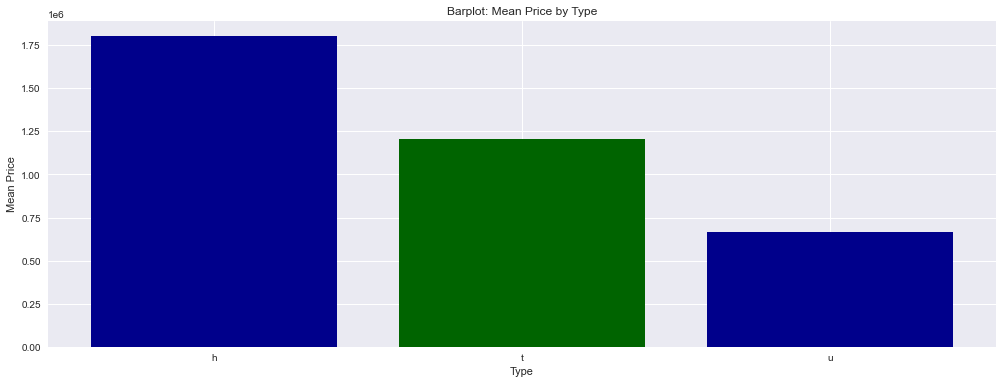

In [179]:
x = df_6type['Type'].unique().tolist()    #Fungsi unique pandas
y = df_6type['Price']

plt.figure(figsize=(17,6))
plt.bar(x, y, color=['darkblue','darkgreen'])
plt.title('Barplot: Mean Price by Type')
plt.xlabel('Type')
plt.ylabel('Mean Price')
plt.show()

In [135]:
df_6method = df_SM[['Method', 'Price']].groupby(by=['Method'], as_index=False).mean().sort_values(by=['Price'], ascending=False)
df_6method

,Method,Price
4,VB,1.455222e+06
0,PI,1.392811e+06
1,S,1.385983e+06
2,SA,1.310289e+06
3,SP,1.113544e+06


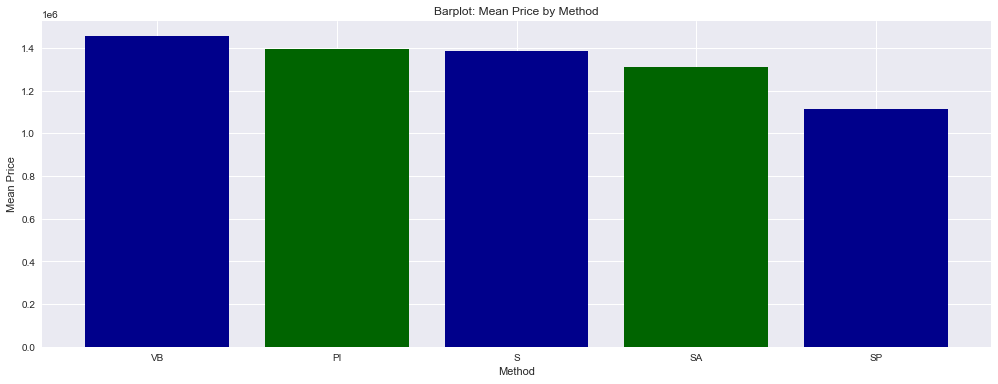

In [180]:
x = df_6method['Method'].unique().tolist()    #Fungsi unique pandas
y = df_6method['Price']

plt.figure(figsize=(17,6))
plt.bar(x, y, color=['darkblue','darkgreen'])
plt.title('Barplot: Mean Price by Method')
plt.xlabel('Method')
plt.ylabel('Mean Price')
plt.show()

### ANSWER
- Region yang memiliki nilai rata-rata harga rumah tertinggi ialah Southern Metropolitan
- Dalam region metropolitan council Area yang memiliki nilai rata-rata harga rumah tertinggi ialah Bayside
- Type yang paling mahal berdasarkan harga rata-rata ialah type h
- Method yang paling mahal ialah VB. Namun secara umum antara method satu dengan yang lain perbedaan rata-rata harganya tidak terlalu jauh. Sehingga konsumen/masyarakat lebih banyak memeiliki variasi untuk menentukkan methodnya
- Region Souther Metropole merupakan region dengan harga rata2 rumah termahal


### 7. Lakukan Uji Hipotesis untuk menguji apakah ada perbedaan harga properti antar Region Name!

In [137]:
df.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0


#### Saya melakukan uji hipotesis dengan metode Normality Test

- https://medium.com/@kurniasp/hypothesis-tests-in-python-e6cf069b1de2 <- Sumber

Dalam statistik , uji normalitas digunakan untuk menentukan apakah kumpulan data dimodelkan dengan baik oleh distribusi normal dan untuk menghitung seberapa mungkin variabel acak yang mendasari dataset akan didistribusikan secara normal. Uji normalitas yang akan kita lakukan kali ini adalah uji Jarque Bera. Berikut adalah hipotesis untuk uji normalitas.

https://miro.medium.com/max/354/1*yyLAV_OPW_HwzP0-gozQtw.png


In [148]:
df_7 = df_6region
df_7

,Regionname,Price
5,Southern Metropolitan,1.372963e+06
0,Eastern Metropolitan,1.104080e+06
4,South-Eastern Metropolitan,9.229438e+05
2,Northern Metropolitan,8.981711e+05
6,Western Metropolitan,8.664205e+05
1,Eastern Victoria,6.999808e+05
3,Northern Victoria,5.948293e+05
7,Western Victoria,3.975234e+05


In [144]:
!pip install scipy

In [146]:
from scipy import stats

In [150]:
stat, p = stats.jarque_bera(df_7['Price'])
stat, p

(0.14827181113689886, 0.9285454907628776)

### ANSWER
Hipotesis test yang dilakukan ialah menguji perbedaan HARGA RATA-RATA rumah di setiap Regionname
- Berdasarkan uji Jarque Bera diperoleh p-value = 0.92 > a = 0.05. Dengan menggunakan tingkat kepercayaan 95% data yang ada mendukung bahwa data terdistribusi normal